## TODOS OS IMPORTS (SIM SÃO MUITOS)

In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

### IMPORTANDO O DATASET E MAPEANDO AS VARIAVEIS QUALITATIVAS

In [3]:
data = pd.read_csv('diabetes2.csv', sep=',', header=0)

# passando colunas qualitativas para quantitativas:
gender_maping = {
    "Male":0.0,
    "Female":1.0,
    "Other":2.0
}

smoking_history_maping = {
    "never":0.0,
    "ever":1.0,
    "No Info":2.0,
    "current":5.0,
    "not current":4.0,
    "former":3.0
}

data['gender'] = data['gender'].map(gender_maping)
data['smoking_history'] = data['smoking_history'].map(smoking_history_maping)

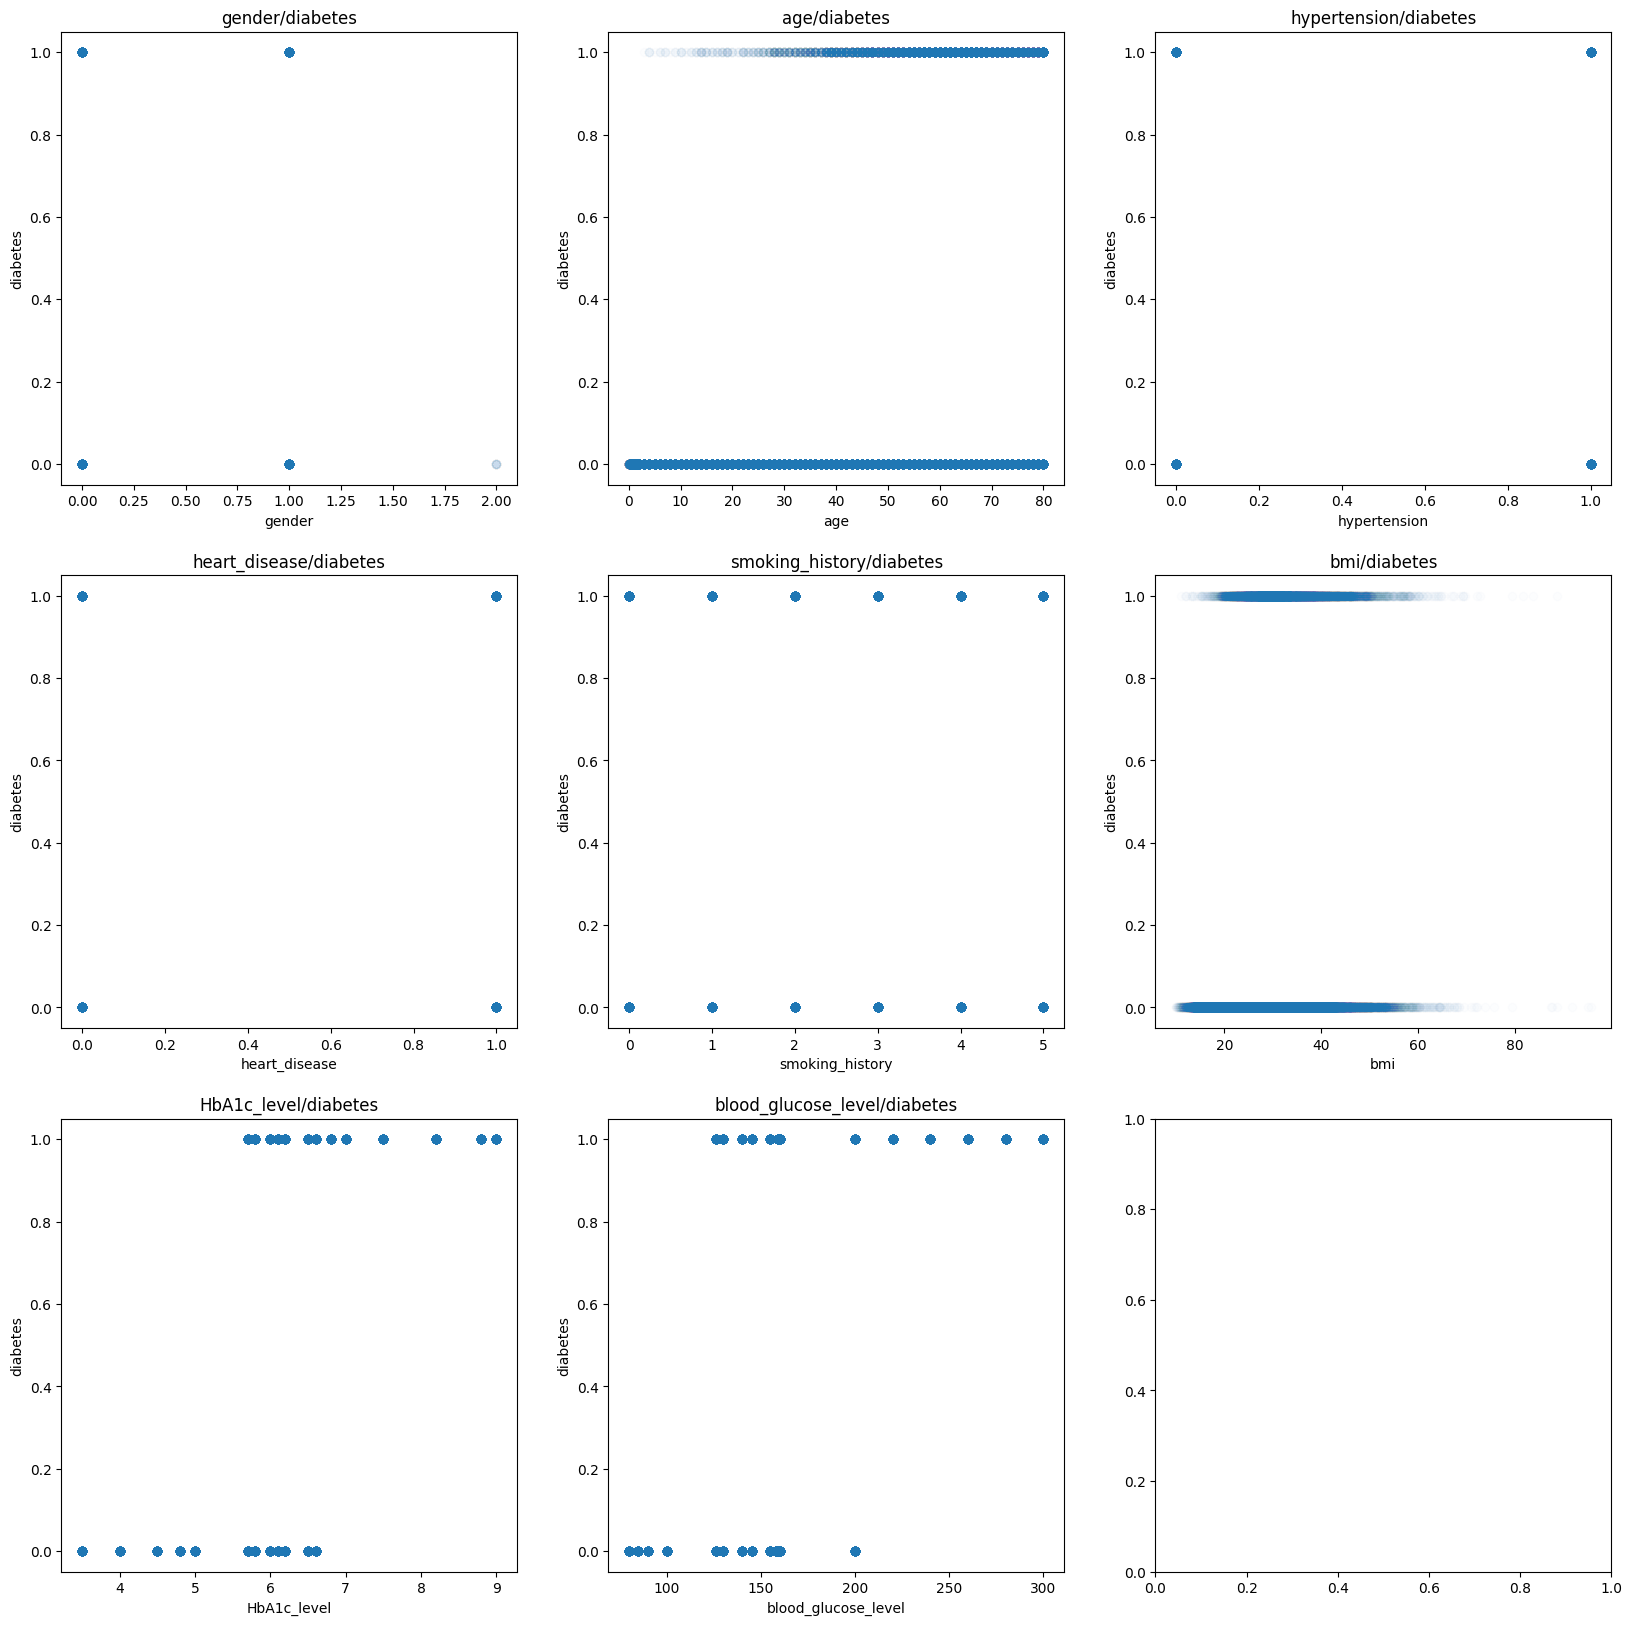

In [4]:
features = data.drop("diabetes", axis=1)
fig, axes = plt.subplots(3, 3, figsize=(20, 20))


axes = axes.ravel() 

for i, feature in enumerate(features):
    axes[i].scatter(data[feature], data['diabetes'], alpha=0.01)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('diabetes')
    axes[i].set_title(f'{feature}/diabetes')


## PARTICIONANDO O DATASET

In [3]:
# X tem todas as linhas de todas as colunas smenos o output
X = data.iloc[:, :8]

# y tem todas as linhas de outpu
y = data.iloc[:, 8]

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

# Escalonando treino e teste:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Descobrindo o melhor K na forca bruta:

Text(0, 0.5, 'Accuracy Score')

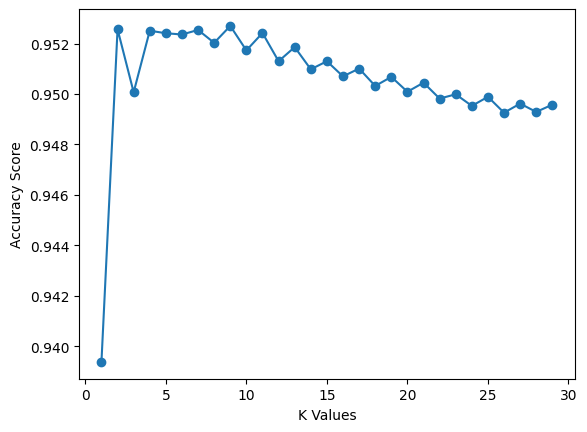

In [5]:
k_values = [i for i in range (1,30)]
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

# Plot k_value X score
plt.plot(k_values, scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

## Classificando de acordo com o melhor K:

In [6]:
# separando o melhor K:
best_index = np.argmax(scores)
best_k = k_values[best_index]

# classificando de acordo com o melhor K:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

# Achando os valores significativos:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.96208
Precision: 0.9324026451138868
Recall: 0.5971764705882353
